# Import Libraries

In [1]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt

# Load the Dataset

In [2]:
#Load the bitcoin dataset

df = pd.read_csv("data/bitcoin_price.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


## Setting the Time Series Index

In [4]:
#Convert "Date" to a datetime object witht he right format YYYY-MM-DD or "%Y-%m-%d"

df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
#Set Date as Index

df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
#Select specific day in dataframe

df.loc['2021-09-24']

Open         4.489430e+04
High         4.508049e+04
Low          4.093656e+04
Close        4.283975e+04
Adj Close    4.283975e+04
Volume       4.283935e+10
Name: 2021-09-24 00:00:00, dtype: float64

### Alternative to set index when we import the data


In [8]:
df1 = pd.read_csv("data/bitcoin_price.csv", index_col = "Date", parse_dates = True)
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


## Resampling Data

In [12]:
#Resample the data to a different time granualrity
#Resampling to a Weekly grain, averaging all the values within the week

df.resample("W"). mean()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,429.916998,437.718195,406.624402,416.859003,416.859003,3.138068e+07
2014-09-28,410.650718,418.668993,399.377141,407.692566,407.692566,2.668180e+07
2014-10-05,369.774288,376.721000,353.207140,361.426570,361.426570,3.952256e+07
2014-10-12,346.927429,363.308864,337.567858,355.234580,355.234580,4.873611e+07
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,2.241458e+07
...,...,...,...,...,...,...
2023-12-03,38038.414062,38743.479353,37766.444196,38399.994978,38399.994978,1.919430e+10
2023-12-10,43002.227121,44027.167411,42586.383929,43538.877232,43538.877232,2.692909e+10
2023-12-17,42369.368862,42969.940848,41148.103237,42020.472656,42020.472656,2.407050e+10


# Exploratory Data Analysis

## Rolling Averages

In [14]:
#Generate a 7-day rolling average for the Closing Price

df['7_day_closing_average'] = df["Close"].rolling(window = 7).mean()

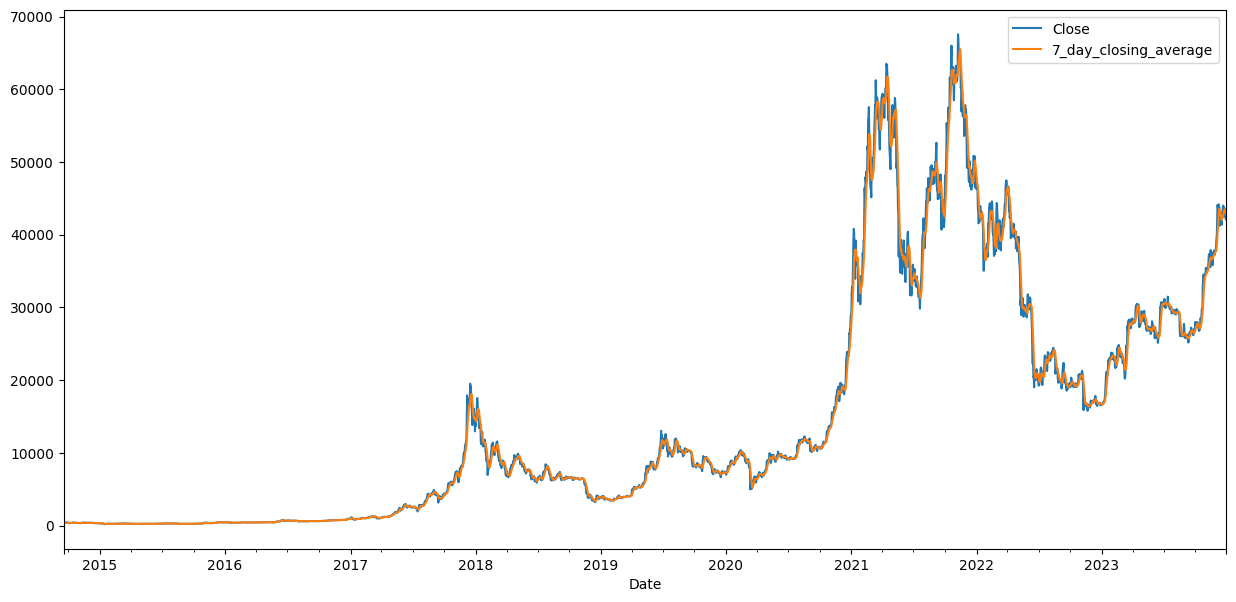

In [16]:
df[["Close", "7_day_closing_average"]].plot(figsize = (15,7))
plt.show()

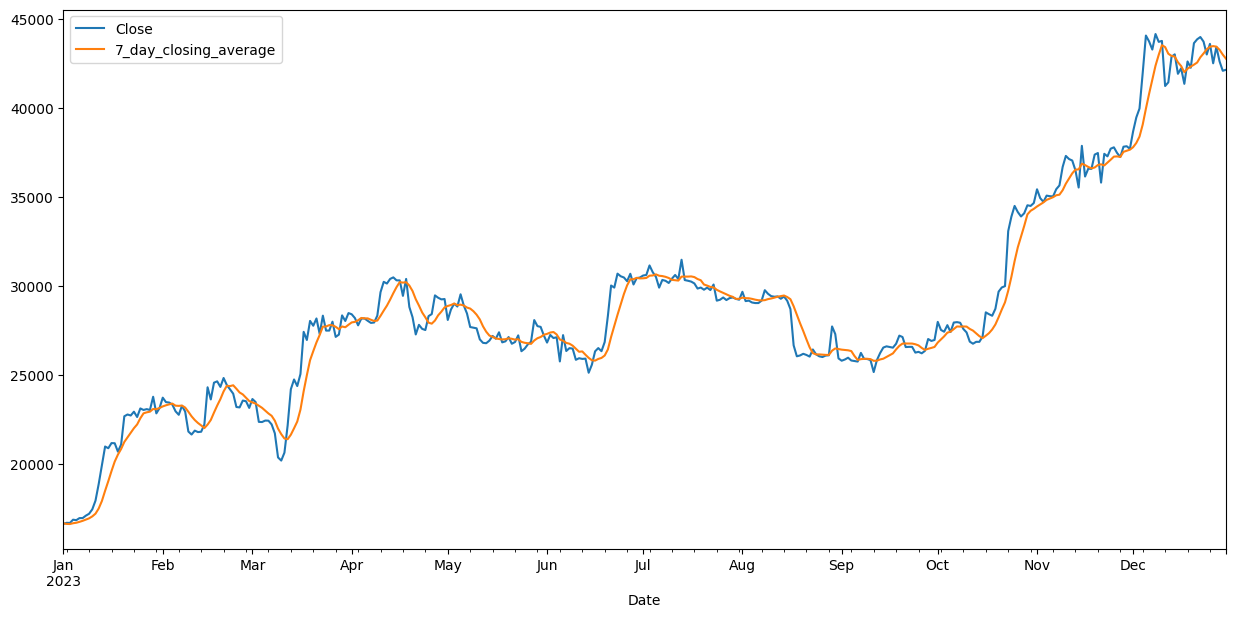

In [17]:
df[["Close", "7_day_closing_average"]].loc['2023'].plot(figsize = (15,7))
plt.show()

### Finding the month with highest closing average

In [20]:
#Find the month with the highest closing average

df.resample('ME').max()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

## Percentage Change Over Period

In [24]:
#Compute the percentage change for the close variable
# Daily Change

df["daily_returns_100%"] = df['Close'].pct_change()*100

In [26]:
# Lets check which days had more than 10% change in price

df[abs(df["daily_returns_100%"]) > 10 ]

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_average,daily_returns_100%
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,19781.450056,10.612188
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607,20409.998326,-10.006132
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,19798.752093,-14.349022


## Data Visualization

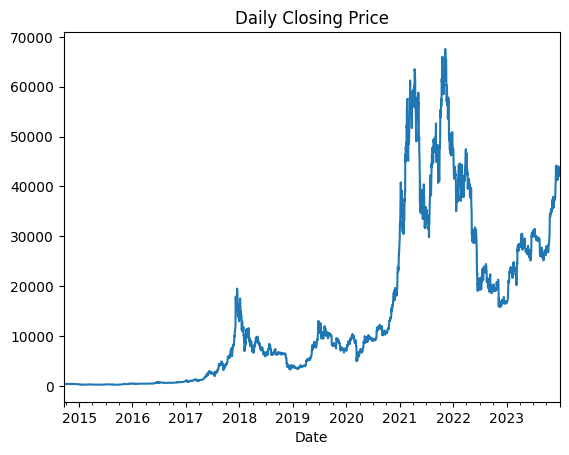

In [28]:
# Daily Closing Price Plot

df["Close"].plot(title="Daily Closing Price")
plt.show()

In [29]:
# Create 30 day rolling average for volume

df["30_day_rolling_vol"] = df["Volume"].rolling(window = 30).mean()

<Axes: xlabel='Date'>

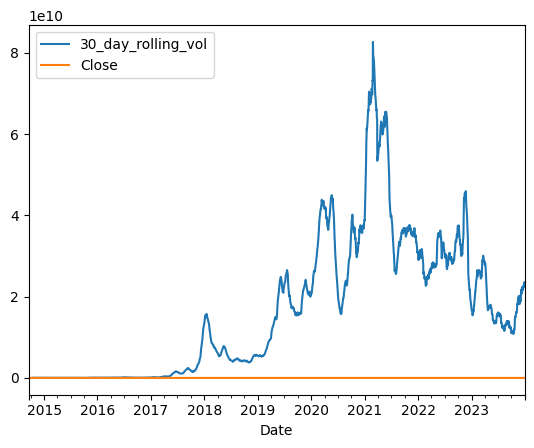

In [31]:
#Plot Closing Price and 30 Day rolling volume
#Observation: Scales are very different. Need a separate axis for both

df[["30_day_rolling_vol", "Close"]].plot()

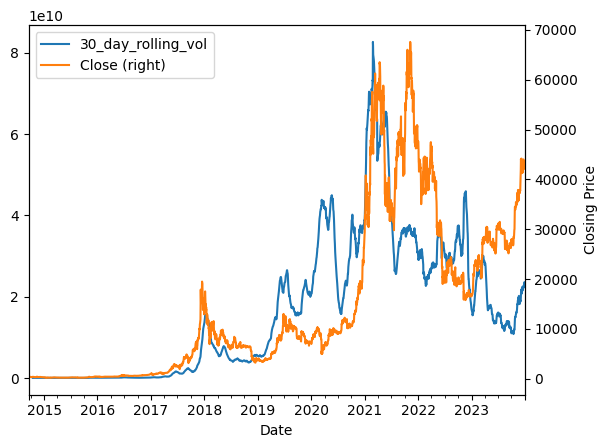

In [ ]:
#Plot on separate axis

df[["30_day_rolling_vol"]].plot(legend=True)

ax = df["Close"].plot(secondary_y=True, legend=True)
ax.set_ylabel("Closing Price")

plt.show()

## Correlation

In [ ]:
#Perform correlation between closing price and 30 day rolling volume
#Pearson Correlation used here. Often now ideal for time series.Spearman Correlation more relevant for time series.

df["30_day_rolling_vol"].corr(df["Close"])

np.float64(0.7504453796186049)

In [35]:
df[["Close", "30_day_rolling_vol"]].corr()

,Close,30_day_rolling_vol
Close,1.000000,0.750445
30_day_rolling_vol,0.750445,1.000000


# Data Manipulation

## Missing Values

In [37]:
#Identify missing values

df.isnull().sum()

Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
7_day_closing_average     6
daily_returns_100%        1
30_day_rolling_vol       29
dtype: int64

### Fill the missing values with next observation

In [40]:
df["30_day_rolling_vol"] = df["30_day_rolling_vol"].bfill()

In [41]:
df.isna().sum()

Open                     0
High                     0
Low                      0
Close                    0
Adj Close                0
Volume                   0
7_day_closing_average    6
daily_returns_100%       1
30_day_rolling_vol       0
dtype: int64

### Other Options

In [ ]:
# Forward Fill
#df["30_day_rolling_vol"] = df["30_day_rolling_vol"].ffill()

# Interpolate Values
#df["7_day_closing_average"] = df["7_day_closing_average"].interpolate(method='linear')

## Fetch the Index & Extract Features

In [ ]:
#Exploring the Index
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq=None)

In [45]:
df.index.day_of_week

Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       ...
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5],
      dtype='int32', name='Date', length=3392)

In [46]:
# Extract the time variables/features

df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["day_of_week"] = df.index.day_of_week
df["weekday"] = df.index.day_name()
df["weekday_numeric"] = df.index.weekday

In [48]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_average,daily_returns_100%,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,NaN,0.835210,3.624856e+07,2014,9,22,0,Monday,0
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,417.462572,8.364742,3.624856e+07,2014,9,23,1,Tuesday,1
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,412.586997,-2.888081,3.624856e+07,2014,9,24,2,Wednesday,2
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,410.748997,-2.748309,3.624856e+07,2014,9,25,3,Thursday,3


In [53]:
# Set a variable for weekend

df["is_weekend"] = df["weekday_numeric"].isin([5,6])

#If we need the feature as int type
#df["is_weekend"] = df["weekday_numeric"].isin([5,6]).astype(int)

In [54]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_average,daily_returns_100%,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6,True


### Feature Engineering - Lagging Variables

In [60]:
df["Close_lag_1"] = df["Close"].shift(1)
df["Close_lag_2"] = df["Close"].shift(2)

df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_average,daily_returns_100%,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend,Close_lag_1,Close_lag_2
Date,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,False,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3,False,457.334015,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4,False,424.440002,457.334015
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5,True,394.795990,424.440002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6,True,408.903992,394.795990


In [61]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_average,daily_returns_100%,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend,Close_lag_1,Close_lag_2
Date,,,,,,,,,,,,,,,,,,
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,43486.929688,-2.505525,2.315280e+10,2023,12,26,1,Tuesday,1,False,43613.140625,43016.117188
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43457.016183,2.169436,2.336140e+10,2023,12,27,2,Wednesday,2,False,42520.402344,43613.140625
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43279.688058,-1.876028,2.340460e+10,2023,12,28,3,Thursday,3,False,43442.855469,42520.402344
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,43008.473772,-1.239690,2.358032e+10,2023,12,29,4,Friday,4,False,42627.855469,43442.855469
2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945,42782.382254,0.136582,2.351025e+10,2023,12,30,5,Saturday,5,True,42099.402344,42627.855469
